Madison-Taylor Fortich  
9291000361

<h1>PART A) Instructions for Simple Linear Regression<h1>

1) Import the Libraries.  
2) Import the Dataset.  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
slr_df = pd.read_csv('data_linear_regression.csv')
slr_df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
slr_df.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

3) Split the Dataset into Training and Testing.  

In [4]:
x = slr_df.iloc[:, :-1].values
y = slr_df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0)

4) Train the Simple Linear Regression model on the Training set result.  
5) Predicting the Test set result.  

In [5]:
regression = LinearRegression()
regression.fit(X_train,y_train)

y_test_pred = regression.predict(X_test)
print(y_test_pred)

[ 40835.10590871 123079.39940819  65134.55626083  63265.36777221
 115602.64545369 108125.8914992  116537.23969801  64199.96201652
  76349.68719258 100649.1375447 ]


6) Visualization of the Training set result.  
7) Visualization of the Test set result.  

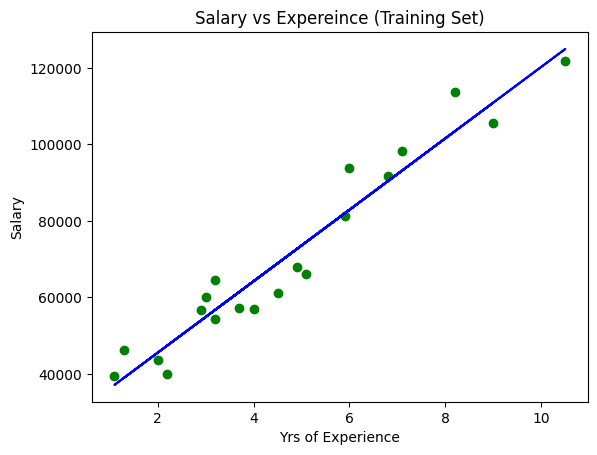

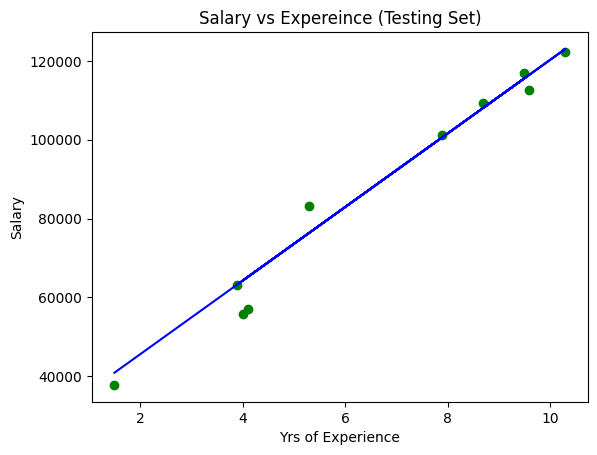

In [6]:
plt.scatter(X_train, y_train, color = 'green')
plt.plot(X_train, regression.predict(X_train), color = 'blue')
plt.title('Salary vs Expereince (Training Set)')
plt.xlabel('Yrs of Experience')
plt.ylabel('Salary')
plt.show()

plt.scatter(X_test, y_test, color = 'green')
plt.plot(X_test, regression.predict(X_test), color = 'blue')
plt.title('Salary vs Expereince (Testing Set)')
plt.xlabel('Yrs of Experience')
plt.ylabel('Salary')
plt.show()

<h1>PART B) Instructions for Multiple Regression <h1>

1) Import the Libraries.  
2) Import the Dataset.  

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

In [8]:
mlr_df = pd.read_csv('data_multiple_regression.csv')
mlr_df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [9]:
x_mlr = mlr_df.iloc[:, :-1].values
y_mlr = mlr_df.iloc[:, -1].values

3) Encode the categorical data.  
4) Split the dataset into the Training set and Test set.  

In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
x_mlr = np.array(ct.fit_transform(x_mlr))
# np.set_printoptions(precision=1, suppress=True, floatmode='fixed')
# print(x)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(x_mlr, y_mlr, test_size = 0.2, random_state = 0)

5) Train the Multiple Linear Regression model on the Training set.  
6) Predict the Test set results.

In [12]:
regression_mlr = LinearRegression()
regression_mlr.fit(X_train, y_train)
mlr_y_test_pred = regression_mlr.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((mlr_y_test_pred.reshape(len(mlr_y_test_pred),1),y_test.reshape(len(y_test),1)),1))

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


<h1>PART C) Instructions for Polynomial Regression<b1>

1) Import the Libraries.  
2) Import the Dataset.  

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures


In [14]:
pr_df = pd.read_csv('data_polynomial_regression.csv')
pr_df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [15]:
x_pr = pr_df.iloc[:, 1:-1].values
y_pr = pr_df.iloc[:,-1].values

3) Train the Linear Regression model on the whole dataset.  
4) Train the Polynomial Regression model on the whole dataset.  

In [16]:
pr_regression = LinearRegression()
pr_regression.fit(x_pr,y_pr)

LinearRegression()

In [17]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree = 4)
x_poly = poly_reg.fit_transform(x_pr)

pr_regression2 = LinearRegression()
pr_regression2.fit(x_poly,y_pr)

LinearRegression()

5) Visualize the Linear Regression results.  
6) Visualize the Polynomial Regression results.  

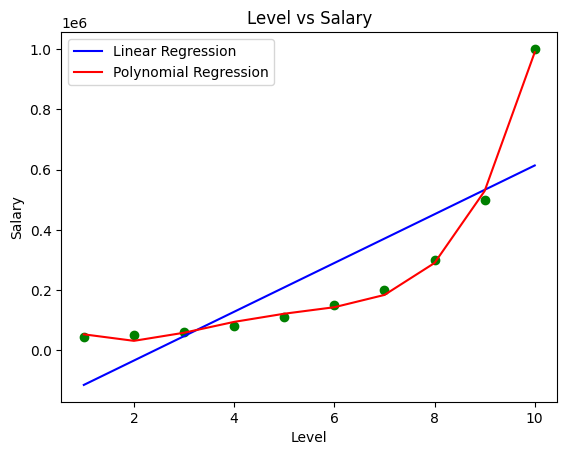

In [18]:
plt.scatter(x_pr, y_pr, color='green') 
plt.plot(x_pr, pr_regression.predict(x_pr), color='blue', label='Linear Regression')
plt.plot(x_pr, pr_regression2.predict(x_poly), color='red', label='Polynomial Regression')
plt.legend()
plt.title('Level vs Salary')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

7) Further visualize the Polynomial Regression results (for higher resolution and smoother curve).

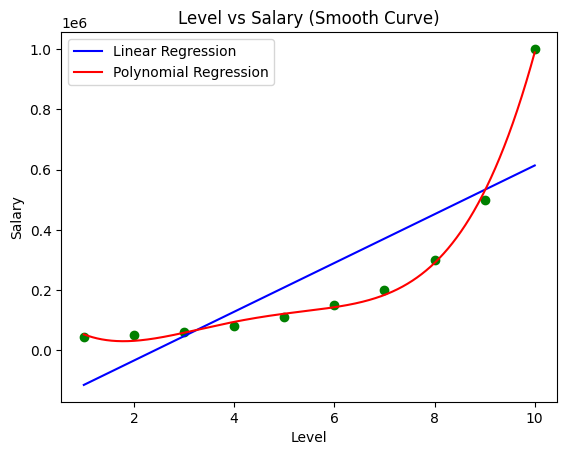

In [19]:
x_grid = np.arange(min(x_pr.flatten()), max(x_pr.flatten()), 0.001)
x_grid = x_grid.reshape((len(x_grid), 1))

plt.scatter(x_pr, y_pr, color='green')
plt.plot(x_pr, pr_regression.predict(x_pr), color='blue', label='Linear Regression')
plt.plot(x_grid, pr_regression2.predict(poly_reg.fit_transform(x_grid)), color='red', label='Polynomial Regression')
plt.title('Level vs Salary (Smooth Curve)')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.legend()
plt.show()

8) Predict a new result with Linear Regression.  
9) Predict a new result with Polynomial Regression.  

Linear Regression Prediction for Level 5.5: 249500.0
Polynomial Regression Prediction for Level 5.5: 132148.43750007742


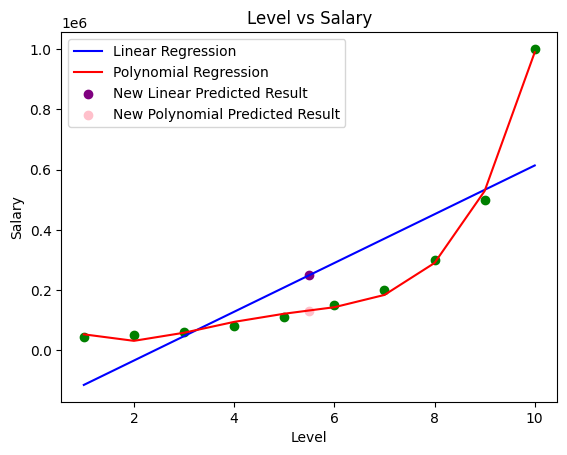

In [20]:
level = [[5.5]]
new_linear_pred = pr_regression.predict(level)
print(f'Linear Regression Prediction for Level 5.5: {new_linear_pred[0]}')

new_poly_pred = pr_regression2.predict(poly_reg.fit_transform(level))
print(f'Polynomial Regression Prediction for Level 5.5: {new_poly_pred[0]}')

plt.scatter(x_pr, y_pr, color='green')
plt.plot(x_pr, pr_regression.predict(x_pr), color='blue', label='Linear Regression')
plt.plot(x_pr, pr_regression2.predict(x_poly), color='red', label='Polynomial Regression')
plt.scatter(5.5, new_linear_pred, color='purple', marker='o', label='New Linear Predicted Result')
plt.scatter(5.5, new_poly_pred, color='pink', marker='o', label='New Polynomial Predicted Result')
plt.legend()
plt.title('Level vs Salary')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()